In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [3]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749 -O aerofit.csv

--2023-08-22 17:00:29--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.164.173.58, 18.164.173.110, 18.164.173.117, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.164.173.58|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit.csv’

aerofit.csv         100%[===================>]   7.11K  --.-KB/s    in 0s      

2023-08-22 17:00:29 (2.84 GB/s) - ‘aerofit.csv’ saved [7279/7279]



In [4]:
data=pd.read_csv('aerofit.csv')

# Defining Problem Statement and Analysing basic metrics

**Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary**

In [4]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
data.shape

(180, 9)

In [6]:
data.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [8]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [9]:
data.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

Observation:


*   We are given data from Aerofit which is one of the leading fitness equipments brand. We are given data for each type of treadmil(3 types) available in Aerofit and we have to we have to analyze the data and tell are there any differences in product choice depending on the characteristics of the customer. We have to create customer profile for each product of tredmil and construct a two-way contingency tables and compute probabilities along with their insights on the business
*   In the given data we are provided with the **product id, age of the customer, gender, their education, maritial status, the average number of times a customer plans to use the tredmil in a week, their annual income, their self-rating on a scale of 1-5 and the average number of miles the customer expects to run on the treadmil in a week.**


*   There are a total of **180 data entries** given in the data which consists of data of **3 different types of tredmils** with customers between the **age limit of 18-50 years** having a **minimum education of 12yrs and maximum education of 21 years**. Maximum prople tend to use the tredmil twice a week to 7 times a week with maximum/mean people using the redmil 3.4(approx 3-4) times a week. Apart from this, people that tend to purchase these tredmils have salaries ranging from **29562 to 104581** having  amean salary of 53719.57 and the median is 50596.5.
*   The data given also does not contain any missing value.




# Non-Graphical Analysis: Value counts and unique attributes

Basic Unique Attributes Analysis

In [10]:
data['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [11]:
data['Usage'].unique()

array([3, 2, 4, 5, 6, 7])

In [12]:
data['Miles'].nunique()

37

Basic Value Counts

In [13]:
data['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [14]:
data['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [15]:
data['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [16]:
data['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [17]:
data['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [18]:
data['Miles'].value_counts().head(10)

85     27
95     12
66     10
75     10
47      9
106     9
94      8
113     8
53      7
100     7
Name: Miles, dtype: int64

Observation:


*   According to the data given, KP281 is the most successful treadmil as it has sold **80 units** followed by KP481 which has sold **60 units** followed by the least selling treadmil KP781 with just **40 units**.

*   The given data consists of treadmils purchased by a total of **104 males and 76 females** among which 107 are married whereas 73 are single.
*   Maximum people that purchase treadmil from Aerofit tend to use it **3 or 4 times a week** and majority of people rate their fitness at **level 3** on a scale of 5.


*   Maximum people purchasing the treadmil from Aerofit aim to do about **85 miles a week** followed by people whose targate is 95,66,75 respectively.



# Visual Analysis - Univariate & Bivariate

What percentage contribution is of each product in the given dataframe?

Text(0.5, 1.0, 'Product Distribution')

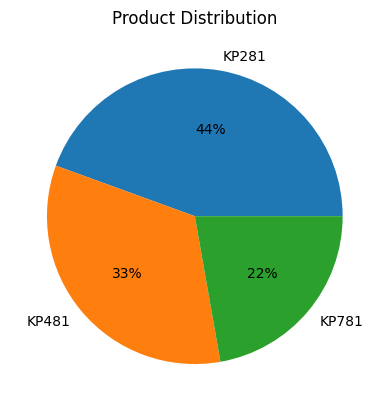

In [13]:
plt.pie(data['Product'].value_counts(),labels=data['Product'].value_counts().index,autopct='%.0f%%')
plt.title('Product Distribution')

Observation:
Given data consists of 44% of KP281, 33% of KP481 and 22% of KP781

People of which age group prefer which treadmil?

Text(0.5, 1.0, 'Age wise distribution of products')

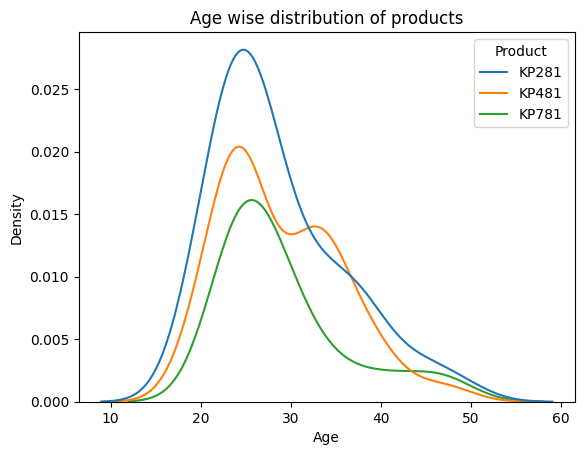

In [4]:
sns.kdeplot(data=data, x='Age',hue='Product')
plt.title('Age wise distribution of products')

Observation:


*   In general, KP281 is the most preferred treadmil out of the three for all the agr groups.
*   Second most popular treadmil is the KP481, followed by KP781.





Which treadmils are more famous in males and which are more famous in females?

Text(0.5, 1.0, 'Gender wise distribution of products')

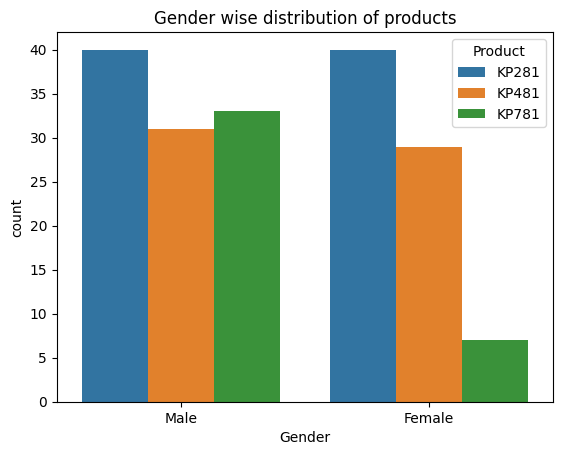

In [5]:
sns.countplot(data=data,x='Gender',hue='Product')
plt.title('Gender wise distribution of products')

Observation:


*   KP281 and KP481 are the two treadmils that are equally preferred by both males and females.
*   KP781 is the treadmil that is mostly preferred by males as about only one sixth of the females prefer this product as compared to to males.



Which products are more popular in married customers and which are more popular in singles?

Text(0.5, 1.0, 'Maritial Status wise distribution of products')

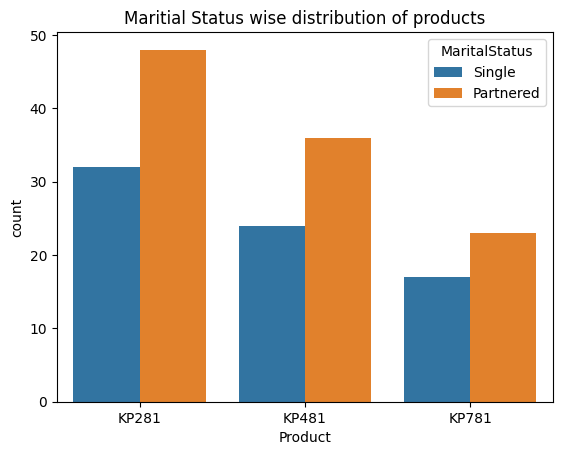

In [6]:
sns.countplot(data=data, x='Product', hue='MaritalStatus')
plt.title('Maritial Status wise distribution of products')

Observation:
All the treadmils are mostly preferred by married couples. However, we can see that the difference between the singles and married couples purchasing KP781 is the least among all.

Depending on the usage, which product is preferred by the people?

Text(0.5, 1.0, 'Usage wise distribution of products')

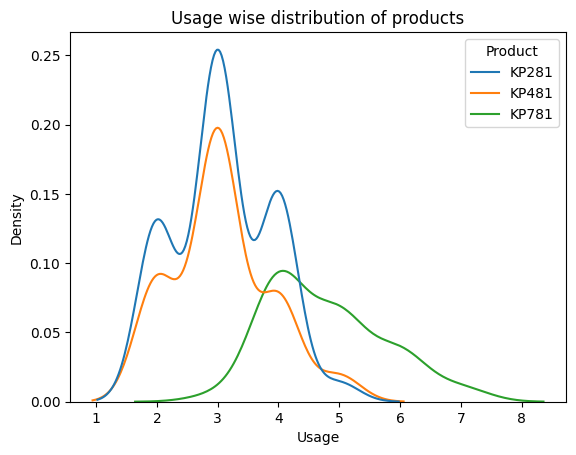

In [7]:
sns.kdeplot(data=data, x='Usage', hue='Product')
plt.title('Usage wise distribution of products')

Observation:


*   People who aim to use the treaddmil the maximum prefer KP781 aver the other two.
*   Rest of the people who does not aim to do hardcore running/usage prefer KP281 and KP481. Among these two also, KP281 is more preferred than KP481.



Depending on the self-assessment of fitness ranging from 1-5(poor-excellent), people of which category prefer which product?

Text(0.5, 1.0, 'Fitness wise distribution of products')

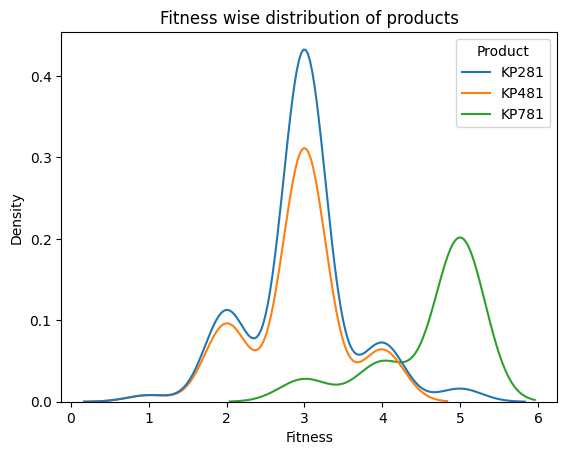

In [8]:
sns.kdeplot(data=data, x='Fitness', hue='Product')
plt.title('Fitness wise distribution of products')

Observation:


*   People who rate themselves as extremely fit, usually prefer KP781 over the other two treadmils.
*   People who rate their fitness level between poor(1) to average(3-4) tend to purchase KP281 or KP481. Moreover among these two, KP281 is more preferred as compared to KP481.



People of which income group prefer which treadmil?

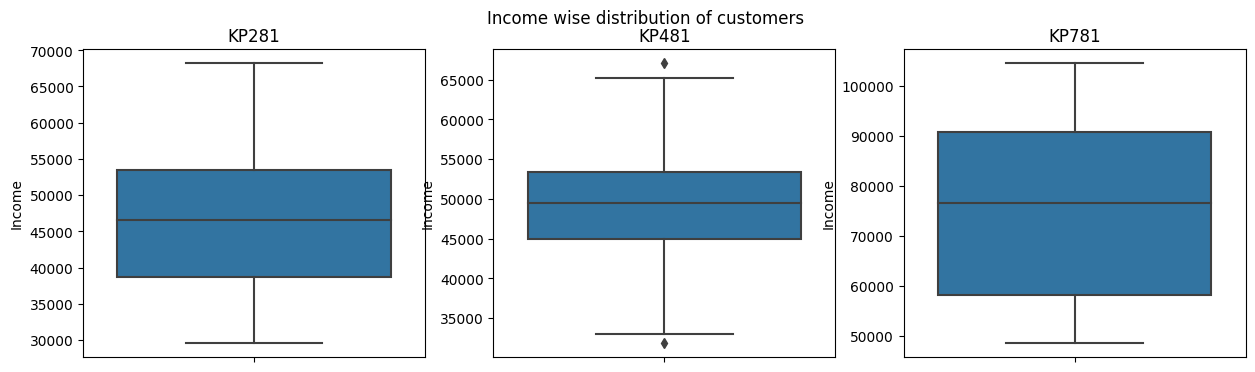

In [9]:
plt.figure(figsize=(15,4))
plt.suptitle('Income wise distribution of customers')
plt.subplot(1,3,1)
sns.boxplot(data=data[data['Product']=='KP281'],y='Income')
plt.ylabel('Income')
plt.title('KP281')

plt.subplot(1,3,2)
sns.boxplot(data=data[data['Product']=='KP481'],y='Income')
plt.ylabel('Income')
plt.title('KP481')

plt.subplot(1,3,3)
sns.boxplot(data=data[data['Product']=='KP781'],y='Income')
plt.ylabel('Income')
plt.title('KP781')

plt.show()

Observation:


*   KP281 is preferred with people majoring having income range from 40000 to 50000.
*   KP481 is preferred with people majoring having income range from about 45000 to 54000.
*   KP781 is the product which seems to be much expensive as it is mainly preferred by people having income between 60000 to 90000.


Depending on the miles goal per week, which people prefer which of the 3 treadmils?

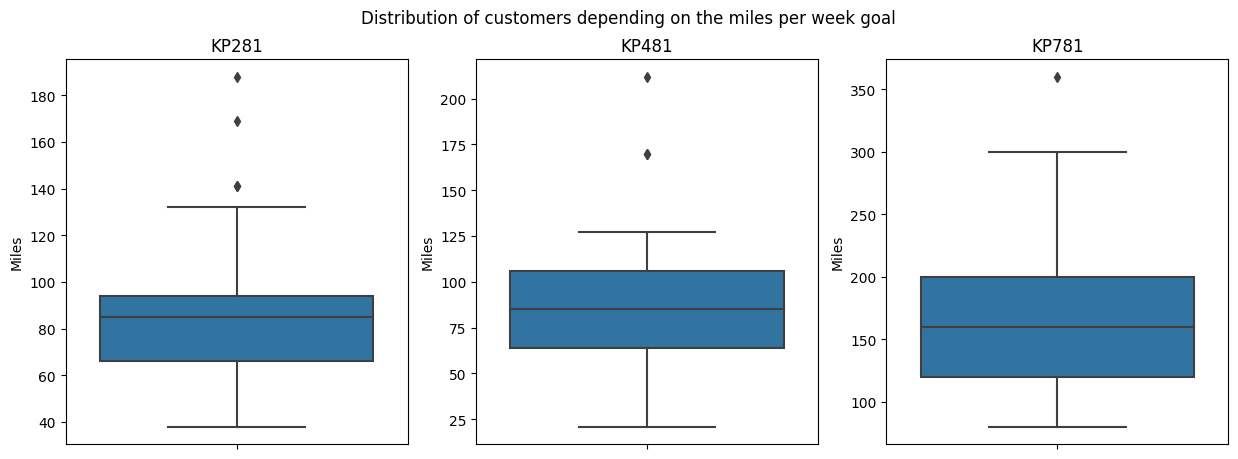

In [10]:
plt.figure(figsize=(15,5))
plt.suptitle('Distribution of customers depending on the miles per week goal')
plt.subplot(1,3,1)
sns.boxplot(data=data[data['Product']=='KP281'],y='Miles')
plt.ylabel('Miles')
plt.title('KP281')

plt.subplot(1,3,2)
sns.boxplot(data=data[data['Product']=='KP481'],y='Miles')
plt.ylabel('Miles')
plt.title('KP481')

plt.subplot(1,3,3)
sns.boxplot(data=data[data['Product']=='KP781'],y='Miles')
plt.ylabel('Miles')
plt.title('KP781')

plt.show()

Observation:

*   Among the people who bought KP281, maximum customers were those having weekly miles target of 70 miles to 95 miles.
*   Among the prople who bought KP481, maximum customers were those having weekly miles target of about 60 miles to 110 miles.
*   KP781 is preferred by those customers who are very much into fitness and aim to do about 125-200 miles a week on it.


Depending on the age of the customer, which age group of people prefer which of the 3 treadmils?

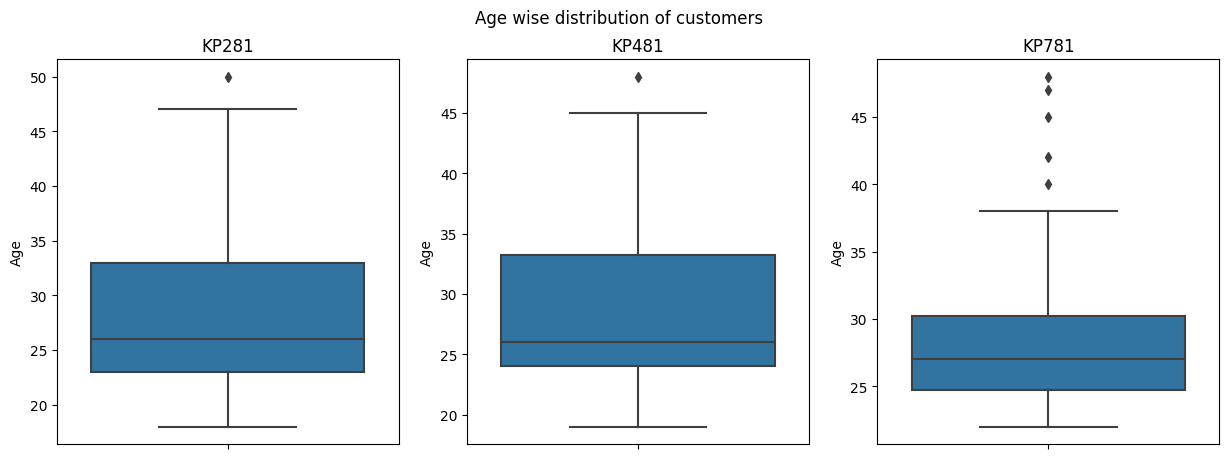

In [11]:
plt.figure(figsize=(15,5))
plt.suptitle('Age wise distribution of customers')
plt.subplot(1,3,1)
sns.boxplot(data=data[data['Product']=='KP281'],y='Age',hue='Product')
plt.ylabel('Age')
plt.title('KP281')

plt.subplot(1,3,2)
sns.boxplot(data=data[data['Product']=='KP481'],y='Age',hue='Product')
plt.ylabel('Age')
plt.title('KP481')

plt.subplot(1,3,3)
sns.boxplot(data=data[data['Product']=='KP781'],y='Age',hue='Product')
plt.ylabel('Age')
plt.title('KP781')

plt.show()

Observation:

Maximum customers who bought the treadmil from Aerofit were in the age range of 25-35. Among the 3 treadmils we can say that KP281 and KP481 are the two which were preferred by slightly larger agegroup whereas KP841 was preferred by comparitively younger age group of customers.
*   Among the customers who purchased KP281, maximum were between the age 23-33.
*   Among the customers who purchased KP481, maximum were between the age 24-34.
*   Among the customers who purchased KP781, maximum were between the age 25-30.


In [29]:
data.corr()

<ipython-input-29-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


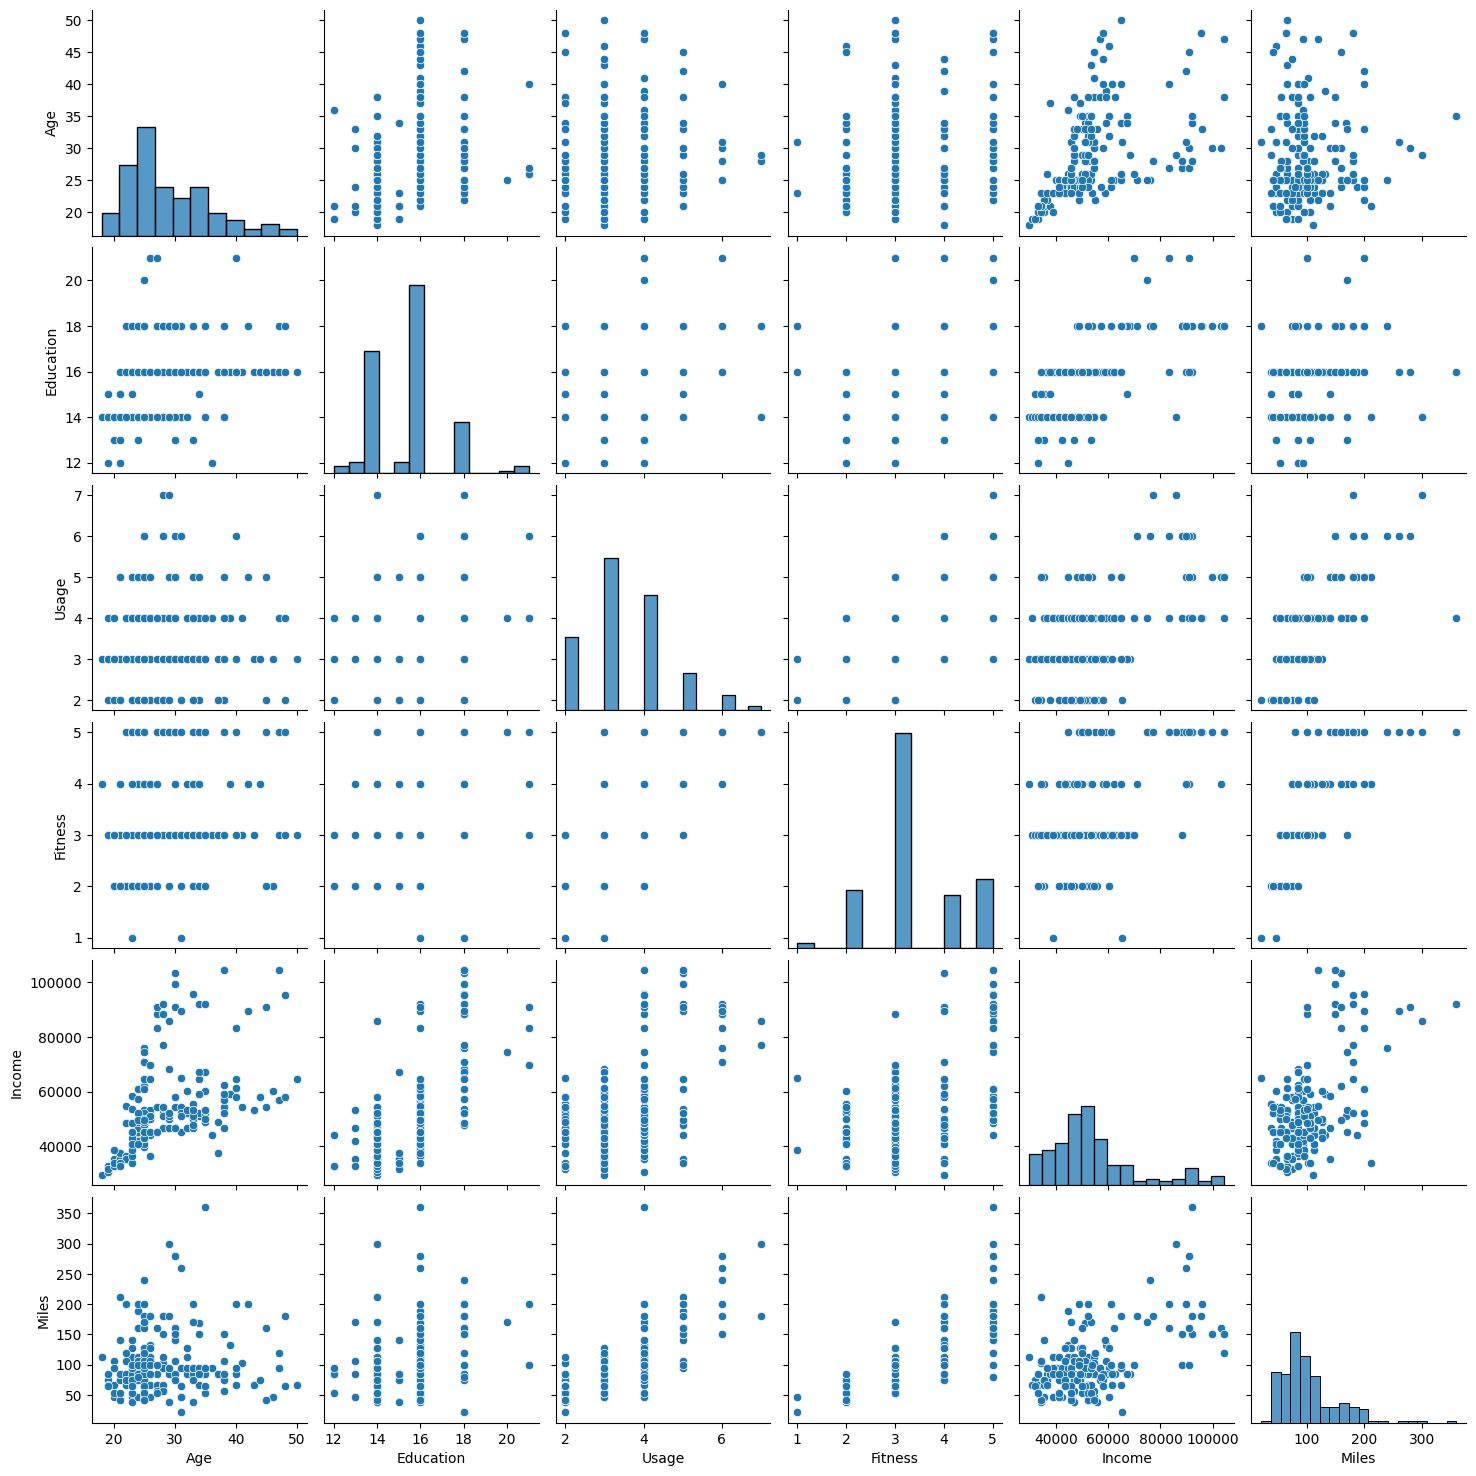

In [27]:
sns.pairplot(data)          #pairplot for the whole data

<ipython-input-31-1499042af9c0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data.corr(),cmap='Blues',annot=True)


<Axes: >

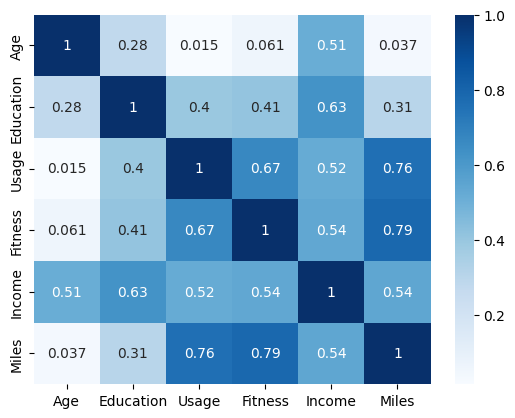

In [31]:
sns.heatmap(data=data.corr(),cmap='Blues',annot=True)

Observation:
After analyzing the pairplot and the heatmap of the data given by aerofit we can infer the following:


*   It is observed that age vs usage, fitness and miles have a weak positive relationship between them.
*   Rest all have moderate positive releationship across the data.



## Further Analysis

For each product, how many customers were married and how many were single?

In [6]:
pd.crosstab(index=data['Product'], columns=data['MaritalStatus'],margins=True,margins_name='Total')

MaritalStatus,Partnered,Single,Total
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
Total,107,73,180


For each product, how many customers were male and how many were female?

In [5]:
pd.crosstab(index=data['Product'], columns=data['Gender'],margins=True,margins_name='Total')

Gender,Female,Male,Total
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
Total,76,104,180


Create a crosstab table and answer the following questions

In [5]:
pd.crosstab(index=data['Gender'], columns=[data['MaritalStatus'],data['Product']],margins=True, margins_name='Total')

MaritalStatus Partnered             Single             Total
Product           KP281 KP481 KP781  KP281 KP481 KP781      
Gender                                                      
Female               27    15     4     13    14     3    76
Male                 21    21    19     19    10    14   104
Total                48    36    23     32    24    17   180

What is the probability of maried and single customers buying KP281?

In [15]:
married_kp281=48/(48+36+23)       #probability of married customers buying kp281
married_kp281

0.4485981308411215

In [16]:
single_kp281=32/(32+24+17)        #probability of single customers buying kp281
single_kp281

0.4383561643835616

What is the probability of married and single customers buying kp481?

In [18]:
married_kp481=36/(48+36+23)       #prbability of married customers buying kp481
married_kp481

0.3364485981308411

In [20]:
single_kp481=24/(32+24+17)        #probability of single customers buying kp481
single_kp481

0.3287671232876712

What is the probability of married and single customers buying kp781?

In [21]:
married_kp781=23/(48+36+23)       #prbability of married customers buying kp781
married_kp781

0.21495327102803738

In [22]:
single_kp781=17/(32+24+17)        #probability of single customers buying kp781
single_kp781

0.2328767123287671

What is the probability of a customer buying kp281 given that they are either male or female?

In [24]:
male_kp281=(21+19)/104               #probability of male customers buying kp281
male_kp281

0.38461538461538464

In [25]:
female_kp281=(27+13)/76             #probability of female customers buying kp281
female_kp281

0.5263157894736842

What is the probability of a customer buying kp481 given that they are either male or female?

In [26]:
male_kp481=(21+10)/104               #probability of male customers buying kp481
male_kp481

0.2980769230769231

In [27]:
female_kp481=(15+14)/76             #probability of female customers buying kp481
female_kp481

0.3815789473684211

What is the probability of a customer buying kp781 given that they are either male or female?

In [28]:
male_kp781=(19+14)/104               #probability of male customers buying kp781
male_kp781

0.3173076923076923

In [29]:
female_kp781=(4+3)/76             #probability of female customers buying kp781
female_kp781

0.09210526315789473

Observation:


*   About **60% customers of each product were married and 40% were single**
*   About **50% of KP281 and kp481 customers were male** whereas about **80% of kp781 customers were male**.

*   **44.68% of married customers preffered kp281**, whereas **33.64% of married customers preferred kp481. About 21.49% of married customers preferred kp781**.
*   4**3.83% of married customers preffered kp281**, whereas **32.81% of married customers preferred kp481. About 23.28% of married customers preferred kp781**.


*   On one hand **38.46% of the male customers preffered kp281** and on the other hand **29.8% of male customers preffered kp481**. This probability was **31.73% in case of male customers preferring kp781**.
*   On one hand **52.63% of the female customers preffered kp281** and on the other hand **38.15% of female customers preffered kp481.** This probability was **9.21% in case of female customers preferring kp781.**






# Missing Value & Outlier Detection

In [8]:
data.isna().sum()             #missing values check

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [13]:
data.describe()               #comparing the mean and 50% of the data to predict the outliers

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


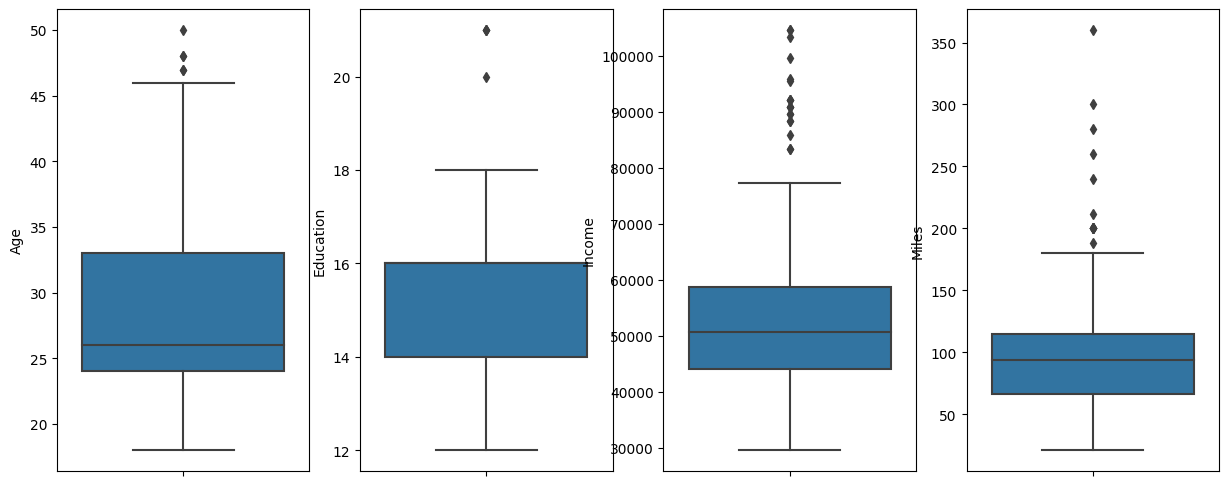

In [14]:
plt.figure(figsize=(15,6))                  #checking outliers visually

plt.subplot(1,4,1)
sns.boxplot(data=data, y='Age')

plt.subplot(1,4,2)
sns.boxplot(data=data, y='Education')

plt.subplot(1,4,3)
sns.boxplot(data=data, y='Income')

plt.subplot(1,4,4)
sns.boxplot(data=data, y='Miles')
plt.show()

In [10]:
norm(28.788889,6.943498).ppf(0.025),norm(28.788889,6.943498).ppf(0.925)           #99.7% of age lies in this range

(15.179882993274102, 38.78427288939823)

In [11]:
norm(15.572222,1.617055).ppf(0.025),norm(15.572222,1.617055).ppf(0.925)           #99.7% of education lies in this range

(12.402852438979583, 17.900023562738387)

In [12]:
norm(53719.577778,16506.684226).ppf(0.025),norm(53719.577778,16506.684226).ppf(0.925)       #99.7% of income lies in this range

(21367.07119086457, 77481.4692021704)

In [13]:
norm(103.194444,51.863605).ppf(0.025),norm(103.194444,51.863605).ppf(0.975)         #95% of income lies in this range

(1.5436460915885135, 204.84524190841148)

Observation:


*   The data given by Aerofit **does not contain any missing values**.
*   After analyzing the above describe function and the boxplots we can say that there are **very less outliers** in the given data. **Income and miles contain more outliers as compared to age and education** but this much outliers are acceptable.



# Business Insights based on Non-Graphical and Visual Analysis

**Comments on the range of attributes**




*   The data provided by Aerofit is of 3 treadmils namely **KP281, KP481 and KP781.**

*   The age of customers buying these products ranges from **18-50 years**.
*   The customers buying these treadmils had a **minimum education of 12 years and maximum age of 21 years.**


*   Usage is the number of days the customer plan to use the treadmil in a week, so ideally it can range from 1-7 but according to the data given it ranges from **2-7**.
*   Fitness is the self assessment of the fitness level by the customer on a scale of 5 i.e it will range from **1 to 5**.
*   People who bought the treadmils had a **minimum income of 29526 and a maximum income of 104581.**
*   The customers who bought the tradmil from Aerofit had a **minimum goal of 21 miles and maximum goal of 360 miles per week.**

**Comments on the distribution of the variables and relationship between them**



*   The data provided by Aerofit is of 3 treadmils namely kp281, kp481 and kp781. **80 customers bought KP241, 60 bought KP481 and 40 bought KP781**.
*   The age of customers buying these products ranges from 18-50 years. Maximum people from were between the age range of **24-33 years** of age and the rest were outliers.


*   The customers buying these treadmils had a minimum education of 12 years and maximum age of 21 years. Maximum people had education between the range of **14-16 years** and the rest were outliers.
*   **Maximum people plan to use the treadmil 3 times a week** followed by people who tend to use it 4 and 2 times respectively.


*   When the customers were asked to rate their fitness level on a scale of 5 then **maximum people rated themselves 3** followed by 5, 2, 4 and 1 respectively.
*   People who bought the treadmils had a minimum income of 29526 and a maximum income of 104581. A majority of custoners had **income ranging between 45000-60000** and the rest were outliers.


*   When asked about the average number of miles each cutomer plans to run each week then then the minimum was 2 and the maximum was 360 miles. A majority of people were in the **range of 75 miles to 125 miles per week** and the rest were outliers.


*   **Upon analyzing the data we can say that only the people who are into hardcore walking/runnning and have a higher income tend to go for KP781 whereas others prefer KP281 and KP481.**
*   **We can say that there is no noticable difference across KP281 and KP481 with respect to customer characteristics.**








**Comments for each univariate and bivariate plot**



*   **Product Distribution:** Given data consists of 44% of KP281, 33% of KP481 and 22% of KP781

*   **Age wise distribution of products:** In general, KP281 is the most preferred treadmil out of the three for all the agr groups.Second most popular treadmil is the KP481, followed by KP781.

*   **Gender wise distribution of products:** KP281 and KP481 are the two treadmils that are equally preferred by both males and females. KP781 is the treadmil that is mostly preferred by males as about only one sixth of the females prefer this product as compared to to males.


*   **Maritial Status wise distribution of products:** All the treadmils are mostly preferred by married couples. However, we can see that the difference between the singles and married couples purchasing KP781 is the least among all.


*   **Usage wise distribution of products:** People who aim to use the treaddmil the maximum prefer KP781 aver the other two. Rest of the people who does not aim to do hardcore running/usage prefer KP281 and KP481. Among these two also, KP281 is more preferred than KP481.

*   **Fitness wise distribution of products:** People who rate themselves as extremely fit, usually prefer KP781 over the other two treadmils.People who rate their fitness level between poor(1) to average(3-4) tend to purchase KP281 or KP481. Moreover among these two, KP281 is more preferred as compared to KP481.

*   **Income wise distribution of customers:** KP281 is preferred with people majoring having income range from 40000 to 50000 whereas KP481 is preferred with people majoring having income range from about 45000 to 54000. KP781 is the product which seems to be much expensive as it is mainly preferred by people having income between 60000 to 90000.
*   **Distribution of customers depending on the miles per week goal:** Among the people who bought KP281, maximum customers were those having weekly miles target of 70 miles to 95 miles whereas among those who bought KP481, maximum customers were those having weekly miles target of about 60 miles to 110 miles. KP781 is preferred by those customers who are very much into fitness and aim to do about 125-200 miles a week on it.

*   **Age wise distribution of customers:** Among the customers who purchased KP281, maximum were between the age 23-33 whereas among those who purchased KP481, maximum ranged between the age 24-34. Among the customers who purchased KP781, maximum were between the age 25-30.


# Recommendations



*   It is clear that a large amount of customers prefer entry level treadmils therefore more focus must be given to KP281 and KP481. Some additional features must be added to KP481 also in order to attract more unique customers.
*   Since as of now there is no noticable difference across KP281 and KP481 with respect to customer characteristics, some additional features must be added to each of them in order to target specific customers such as KP281 should target beginners and KP481 should targer intermediates.
*   One or two more treadmil models must be introduced which should range between KP281 and KP781 i.e. should focus on customers who are above the beginner level but below the hardcore level and can afford premium amount as compared to KP281 for their experience.

*   It is seen the KP781 is preferred by customers with high income, so a lite version of KP781 must be introduced so that people who are into hardcore exercise but cant afford such a hefty price can also have a similar experience. KP781 must have its premiumness and some additional so that its sales will not affect.
